# multiple  linear regression
### cars 93

In [1]:
import pandas as pd
import numpy as  np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r"C:\Users\admin\Downloads\Cars93.csv"

In [3]:
df  =  pd.read_csv(path  ,  keep_default_na  =  False , na_values=["" ,  "NA"])

# basic checks

In [4]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
df.shape

(93, 28)

In [6]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

# basic  quality checks


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [8]:
# CHECK  MISSING VALUES
n  = df.isnull().sum()
n[n>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [9]:
# check  duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(['id'] ,  inplace= True ,  axis  =  1)

In [11]:
import seaborn as  sns
import  matplotlib.pyplot as  plt

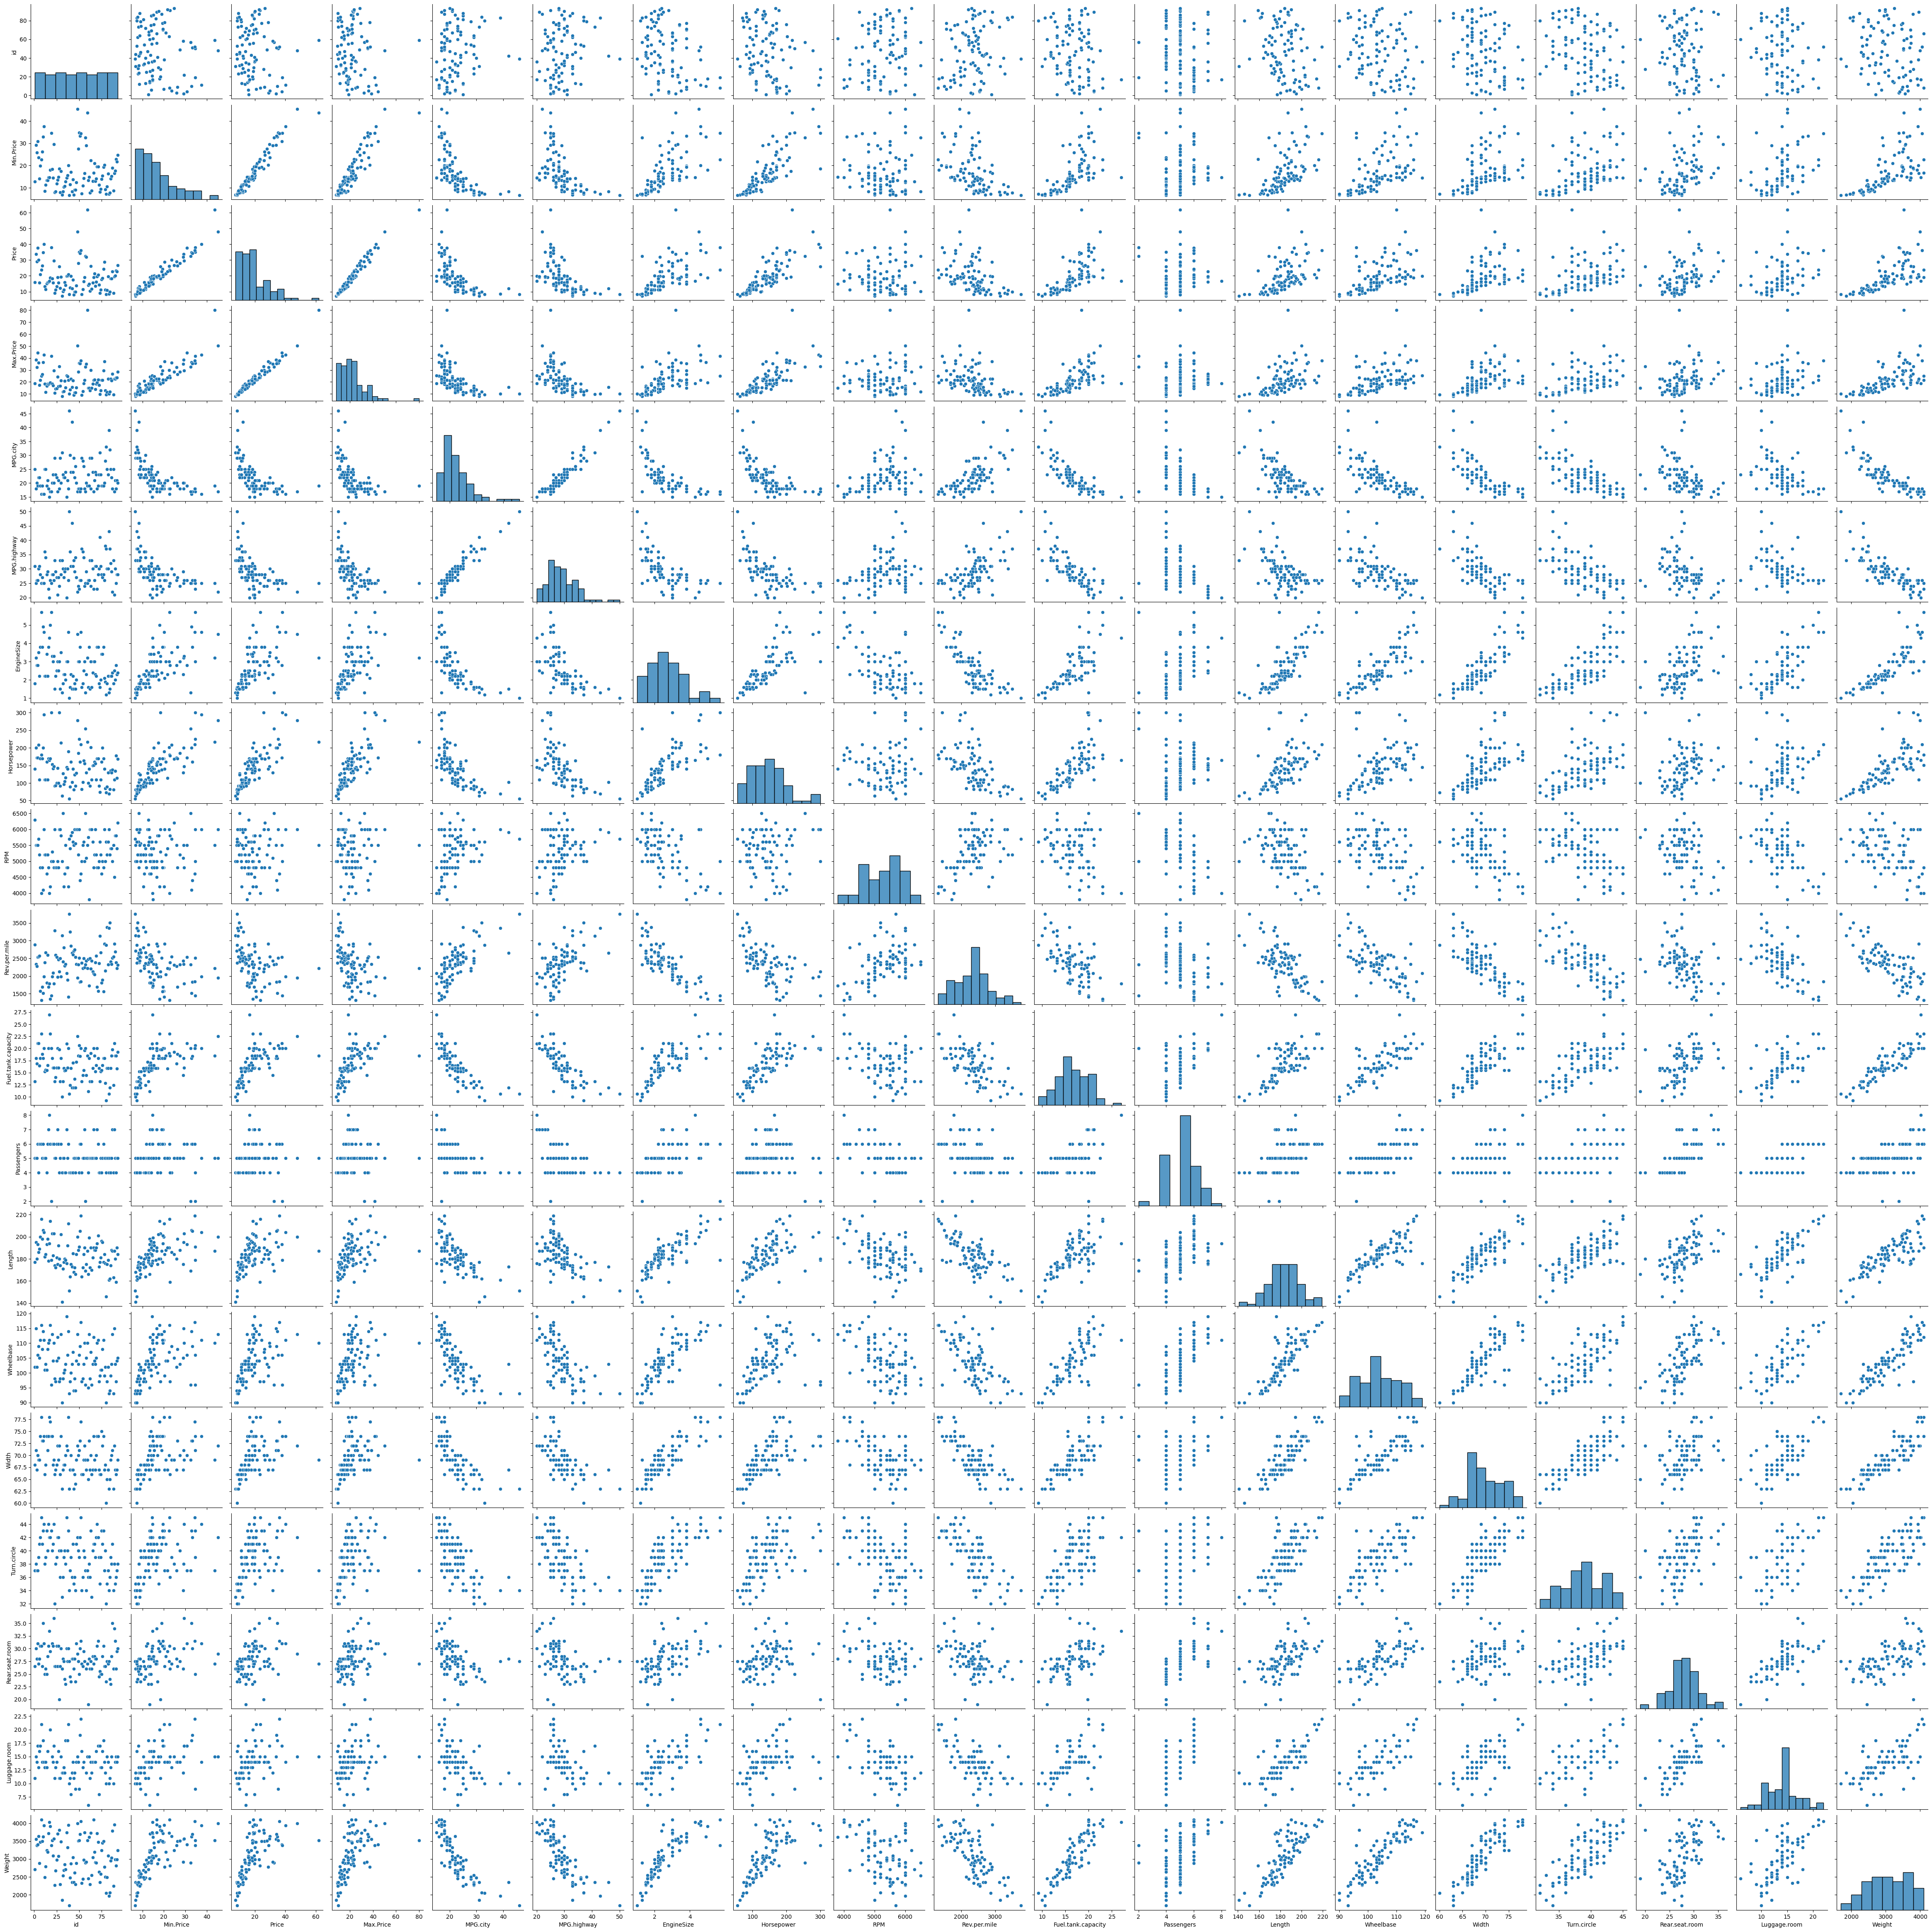

In [12]:
sns.pairplot(df)

# SEPERATE    X &Y

In [12]:
# dependent =  price
x = df.drop(['Weight'] , axis  =  1)
y  =  df['Weight']

In [13]:
x.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [14]:
y.head()

0    2705
1    3560
2    3375
3    3405
4    3640
Name: Weight, dtype: int64

In [15]:
# seperate categorical  and numerical column  list
cat  = x.columns[x.dtypes == "object"]
num  =  x.columns[x.dtypes != "object"]

In [16]:
cat

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

In [17]:
num

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')

# create  pipelines
- number pipeline
- categorical  pipeline

In [18]:
from  sklearn.pipeline import Pipeline
from  sklearn.preprocessing import OrdinalEncoder ,  StandardScaler
from  sklearn.compose import  ColumnTransformer
from sklearn.impute import SimpleImputer

In [19]:
num_pipeline = Pipeline(steps  = [("imputer" , SimpleImputer(strategy= "mean")) ,
                                 ( "scaler"   , StandardScaler())])

cat_pipeline  =  Pipeline(steps= [('imputer' ,  SimpleImputer(strategy= 'most_frequent' )) ,  
                                  ('encoder' ,  OrdinalEncoder())])

In [20]:
pre = ColumnTransformer([('num_pipeline' ,  num_pipeline ,  num) , 
                          ('cat_pipeline' ,  cat_pipeline ,  cat)])

In [21]:
pre

,transformers,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


#### Apply to  data
-  tranfform data by using  pipeline

In [22]:
x_pre  = pre.fit_transform(x)
x_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  1.        ,
         1.        , 87.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  1.        ,
         1.        , 91.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  1.        ,
         1.        , 92.        ]], shape=(93, 26))

In [23]:
col=  pre.get_feature_names_out()

In [24]:
col

array(['num_pipeline__Min.Price', 'num_pipeline__Price',
       'num_pipeline__Max.Price', 'num_pipeline__MPG.city',
       'num_pipeline__MPG.highway', 'num_pipeline__EngineSize',
       'num_pipeline__Horsepower', 'num_pipeline__RPM',
       'num_pipeline__Rev.per.mile', 'num_pipeline__Fuel.tank.capacity',
       'num_pipeline__Passengers', 'num_pipeline__Length',
       'num_pipeline__Wheelbase', 'num_pipeline__Width',
       'num_pipeline__Turn.circle', 'num_pipeline__Rear.seat.room',
       'num_pipeline__Luggage.room', 'cat_pipeline__Manufacturer',
       'cat_pipeline__Model', 'cat_pipeline__Type',
       'cat_pipeline__AirBags', 'cat_pipeline__DriveTrain',
       'cat_pipeline__Cylinders', 'cat_pipeline__Man.trans.avail',
       'cat_pipeline__Origin', 'cat_pipeline__Make'], dtype=object)

In [25]:
cols  = []
for  i  in col:
    cols.append(i.split('__')[1])


In [28]:
cols
len(cols)

26

In [29]:
# convert in dataframe
x_pre =  pd.DataFrame(x_pre)

In [32]:
x_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Luggage.room,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0.000000,30.0,41.0,5.0,2.0,1.0,2.0,1.0,1.0,88.0
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0.039228,30.0,64.0,0.0,2.0,1.0,1.0,1.0,1.0,90.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.396643,30.0,28.0,4.0,2.0,1.0,3.0,1.0,1.0,87.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.039228,31.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,91.0


In [31]:
x_pre.columns  =  cols

# feature scaling
- forward  selection


In [33]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
model  =  LinearRegression()
sel  =  SequentialFeatureSelector(estimator= model ,  direction= 'forward' ,  n_jobs= -1)

In [34]:
sel.fit(x_pre , y)

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,-1
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [35]:
indep_fields  = sel.get_feature_names_out()
indep_fields 

array(['MPG.highway', 'Horsepower', 'RPM', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Rear.seat.room',
       'Manufacturer', 'Type', 'Cylinders', 'Origin'], dtype=object)

# create  pipeline 2

In [36]:
X = x[indep_fields ]

In [37]:
X

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room,Manufacturer,Type,Cylinders,Origin
0,31,140,6300,13.2,5,177,102,68,26.5,Acura,Small,4,non-USA
1,25,200,5500,18.0,5,195,115,71,30.0,Acura,Midsize,6,non-USA
2,26,172,5500,16.9,5,180,102,67,28.0,Audi,Compact,6,non-USA
3,26,172,5500,21.1,6,193,106,70,31.0,Audi,Midsize,6,non-USA
4,30,208,5700,21.1,4,186,109,69,27.0,BMW,Midsize,4,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,21,109,4500,21.1,7,187,115,72,34.0,Volkswagen,Van,5,non-USA
89,30,134,5800,18.5,5,180,103,67,31.5,Volkswagen,Compact,4,non-USA
90,25,178,5800,18.5,4,159,97,66,26.0,Volkswagen,Sporty,6,non-USA
91,28,114,5400,15.8,5,190,104,67,29.5,Volvo,Compact,4,non-USA


In [38]:
X.shape
cat1  =  X.columns[X.dtypes == 'object']
num1  =  X.columns[X.dtypes != 'object']
print(cat)
print()
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')


Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')


In [39]:
from  sklearn.preprocessing import OneHotEncoder

In [40]:
num_pipeline2 = Pipeline(steps  = [("imputer" , SimpleImputer(strategy= "mean")) ,
                                 ( "scaler"   , StandardScaler())])

cat_pipeline2  =  Pipeline(steps= [('imputer' ,  SimpleImputer(strategy= 'most_frequent' )) ,  
                                ('encoder' ,  OneHotEncoder( handle_unknown= 'ignore'))])

In [41]:
pre1  = ColumnTransformer([('num_pipeline2' ,  num_pipeline2 ,  num1) , 
                          ('cat_pipeline2' ,  cat_pipeline2 ,  cat1)])

In [42]:
pre1

,transformers,"[('num_pipeline2', ...), ('cat_pipeline2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [87]:
pre1

,transformers,"[('num_pipeline2', ...), ('cat_pipeline2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [43]:
x_sel  =  pre1.fit_transform(X).toarray()


In [44]:
x_sel

array([[ 0.36092485, -0.07348445,  1.71748854, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77051373,  1.07832243,  0.36958614, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58194063,  0.54081255,  0.36958614, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.77051373,  0.65599324,  0.87504954, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20479444, -0.57260077,  0.20109834, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20479444,  0.46402543,  1.54900074, ...,  0.        ,
         0.        ,  1.        ]], shape=(93, 55))

In [45]:
cols1  =  pre1.get_feature_names_out()

In [46]:
columns_sel =  []
for  i  in  cols1:
    columns_sel.append(i.split('__')[1])

In [47]:
columns_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room',
 'Manufacturer_Acura',
 'Manufacturer_Audi',
 'Manufacturer_BMW',
 'Manufacturer_Buick',
 'Manufacturer_Cadillac',
 'Manufacturer_Chevrolet',
 'Manufacturer_Chrylser',
 'Manufacturer_Chrysler',
 'Manufacturer_Dodge',
 'Manufacturer_Eagle',
 'Manufacturer_Ford',
 'Manufacturer_Geo',
 'Manufacturer_Honda',
 'Manufacturer_Hyundai',
 'Manufacturer_Infiniti',
 'Manufacturer_Lexus',
 'Manufacturer_Lincoln',
 'Manufacturer_Mazda',
 'Manufacturer_Mercedes-Benz',
 'Manufacturer_Mercury',
 'Manufacturer_Mitsubishi',
 'Manufacturer_Nissan',
 'Manufacturer_Oldsmobile',
 'Manufacturer_Plymouth',
 'Manufacturer_Pontiac',
 'Manufacturer_Saab',
 'Manufacturer_Saturn',
 'Manufacturer_Subaru',
 'Manufacturer_Suzuki',
 'Manufacturer_Toyota',
 'Manufacturer_Volkswagen',
 'Manufacturer_Volvo',
 'Type_Compact',
 'Type_Large',
 'Type_Midsize',
 'Type_Small',
 'Type_Sporty',
 'Typ

In [48]:
len(columns_sel)

55

In [49]:
# convert data in dataframe
x_sel  =  pd.DataFrame(x_sel,  columns= columns_sel)

In [50]:
x_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room,Manufacturer_Acura,...,Type_Sporty,Type_Van,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Origin_USA,Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# split data in train and test

In [51]:
from  sklearn.model_selection import train_test_split

In [52]:
x_train  ,  x_test  ,  y_train  ,  y_test  = train_test_split(x_sel,  y , random_state= 23,  test_size= 0.15)  


In [53]:
print(x_train.shape  , x_test.shape)
print(y_train.shape  , y_test.shape)

(79, 55) (14, 55)
(79,) (14,)


# fit model

In [54]:
from  sklearn.linear_model import  LinearRegression

In [55]:
model  =  LinearRegression()

In [56]:
model.fit(x_train  , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model.coef_

array([-5.49963222e+01,  3.01212083e+02, -8.44046086e+01, -4.38366185e+01,
       -2.46480535e+01,  1.20233521e+02,  1.21908032e+02,  1.28322441e+02,
       -2.01812268e+01, -1.65141724e+02,  3.88223966e+02, -6.03448044e+00,
       -1.19181164e+02,  9.73319609e+01, -5.47140007e+01, -6.76744094e+01,
        1.31795023e+02,  9.94312699e+01, -9.94759830e-14,  1.44774997e+00,
       -2.39031483e-01, -1.56711197e+02,  3.98727592e+01, -5.68434189e-14,
       -4.71488015e+01,  1.12027487e+02, -9.28742587e+01, -9.94571717e+01,
        1.75131595e+01,  4.70529193e+01,  5.66367902e+01, -2.10904990e+02,
        0.00000000e+00, -5.92153710e+01, -9.43748362e+01,  1.42108547e-14,
        1.51075951e+02,  2.17963910e+01, -1.52009704e+02,  1.24065228e+02,
        3.74104852e+01, -1.40738923e+02,  9.37429037e+01, -1.77969888e+00,
       -1.78821434e+02, -1.87218121e+02,  4.14815273e+02,  1.92302652e+02,
        1.80964595e+02,  1.48330690e+02,  1.69328267e+01, -3.54507418e+02,
       -1.84023345e+02, -

In [58]:
model.intercept_

np.float64(3039.6483927161566)

In [59]:
# score for training
model.score(x_train  , y_train)

0.9873568700757496

In [60]:
# score  for  testing data
model.score(x_test ,  y_test)

0.8589889447872429

# Evaluate  models

In [61]:
from sklearn.metrics import (mean_absolute_error , 
                             mean_absolute_percentage_error 
                             , root_mean_squared_error ,
                                 mean_squared_error ,  
                                 r2_score)

In [62]:
x_sel.shape[0]

93

In [63]:
def  evaluate(model  , x  , y):
    y_pred =  model.predict(x)
    MSE = mean_squared_error(y ,  y_pred)
    RMSE = root_mean_squared_error(y, y_pred)
    MAE  = mean_absolute_error(y  , y_pred)
    MAPE  = mean_absolute_percentage_error(y, y_pred)
    r2 = r2_score(y ,  y_pred)
    ad_r2=  1  -  ((1-r2)*(x.shape[0] - 1)/(x.shape[0] - x.shape[1] - 1))
    

    print(f"MSE  -- >  {MSE}" )
    print(f"RMSE  -- >  {RMSE}" )
    print(f"MAE  -- >  {MAE}" )
    print(f"MAPE  -- >  {MAPE}" )
    print(f"r2 score  -- >  {r2}" )
    print(f"adjusted  r2  -- >  {ad_r2}" )

In [64]:
evaluate(model  ,x_train ,y_train)

MSE  -- >  4449.599058565064
RMSE  -- >  66.70531506982832
MAE  -- >  50.46379772061741
MAPE  -- >  0.017667063977377863
r2 score  -- >  0.9873568700757496
adjusted  r2  -- >  0.9571232985177595


In [65]:
evaluate(model  ,x_test ,y_test)

MSE  -- >  40801.26104814757
RMSE  -- >  201.99322030243385
MAE  -- >  174.10190328321914
MAPE  -- >  0.052898958069487044
r2 score  -- >  0.8589889447872429
adjusted  r2  -- >  1.0436462789944247
